In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


df = pd.read_csv("C:\\Users\\Asus\\OneDrive\\Desktop\\ML\\road_accident_survival.csv")
print(df)

      Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0      56  Female        27.000000          No            No         1
1      69  Female        46.000000          No           Yes         1
2      46    Male        46.000000         Yes           Yes         0
3      32    Male       117.000000          No           Yes         0
4      60  Female        40.000000         Yes           Yes         0
...   ...     ...              ...         ...           ...       ...
5529   57    Male        18.460537         NaN            No         1
5530   21  Female        83.441699         Yes           Yes         1
5531   64  Female        64.015568          No            No         1
5532   48  Female       103.322177         Yes           Yes         0
5533   45    Male        50.122922         Yes            No         1

[5534 rows x 6 columns]


In [15]:
# Summary statistics
print("=== Summary Statistics ===")
print(df.describe(include='all'))
print("\n=== Missing Values ===")
print(df.isnull().sum())

=== Summary Statistics ===
                Age Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  \
count   5534.000000   5373      5371.000000        5374          5374   
unique          NaN      2              NaN           2             2   
top             NaN   Male              NaN          No           Yes   
freq            NaN   3165              NaN        3147          2703   
mean      48.547524    NaN        69.913067         NaN           NaN   
std       17.772306    NaN        30.450897         NaN           NaN   
min       18.000000    NaN       -51.687842         NaN           NaN   
25%       33.000000    NaN        48.982122         NaN           NaN   
50%       49.000000    NaN        70.151955         NaN           NaN   
75%       64.000000    NaN        90.419761         NaN           NaN   
max       79.000000    NaN       177.555649         NaN           NaN   

           Survived  
count   5534.000000  
unique          NaN  
top             NaN  
freq    

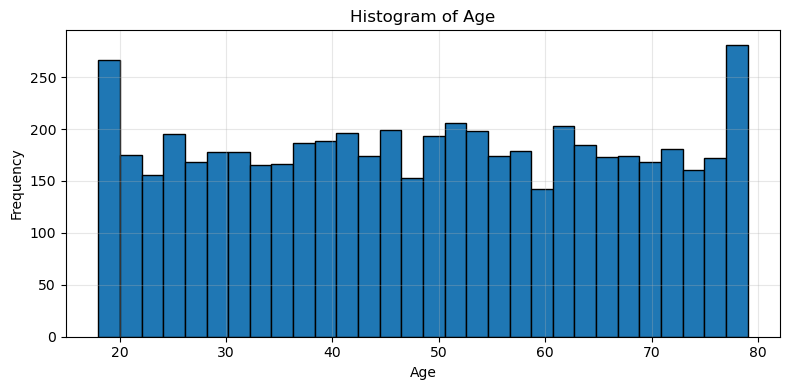

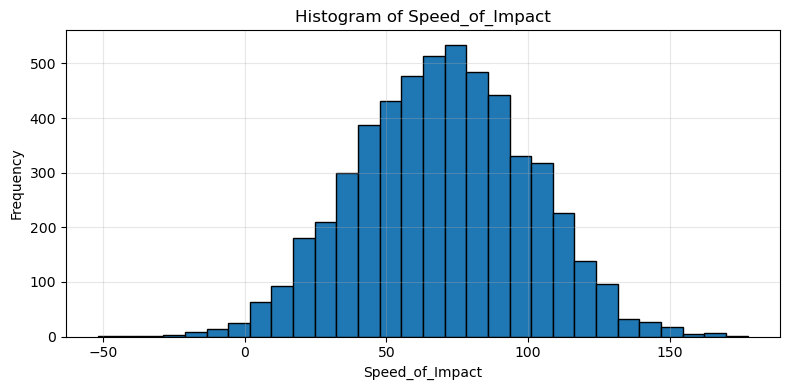

In [16]:
#  Histograms for numeric variables
numeric_cols = ['Age', 'Speed_of_Impact']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


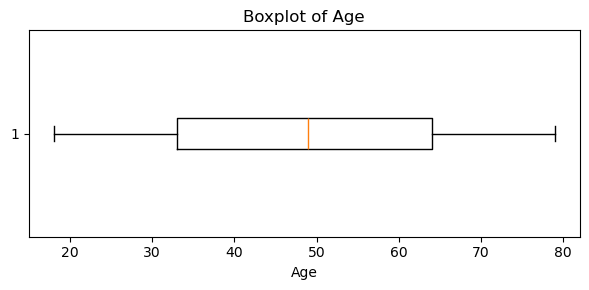

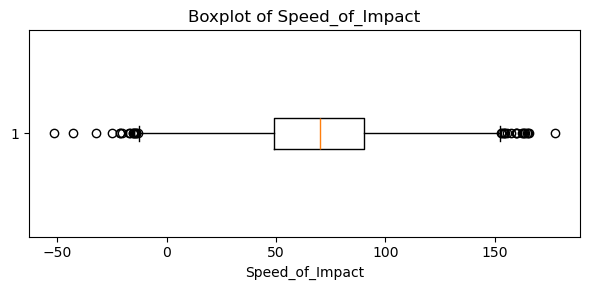

In [17]:
# Boxplots (to spot outliers)
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

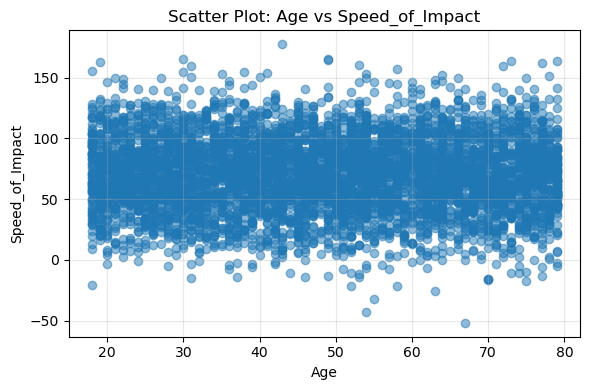

In [18]:
# Scatter plot: Age vs Speed_of_Impact
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Speed_of_Impact'], alpha=0.5)
plt.title('Scatter Plot: Age vs Speed_of_Impact')
plt.xlabel('Age')
plt.ylabel('Speed_of_Impact')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


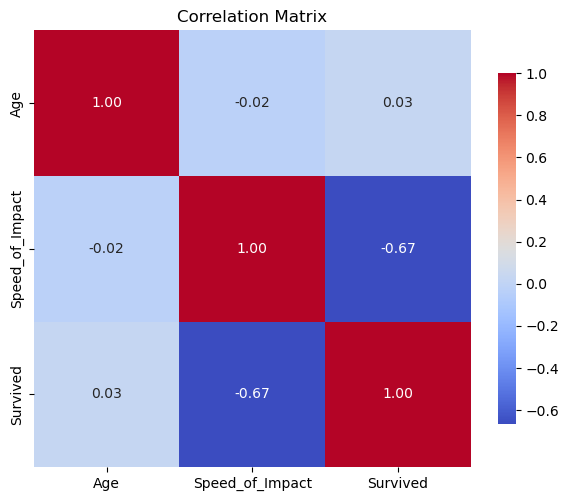

In [19]:
#  Correlation matrix heatmap
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

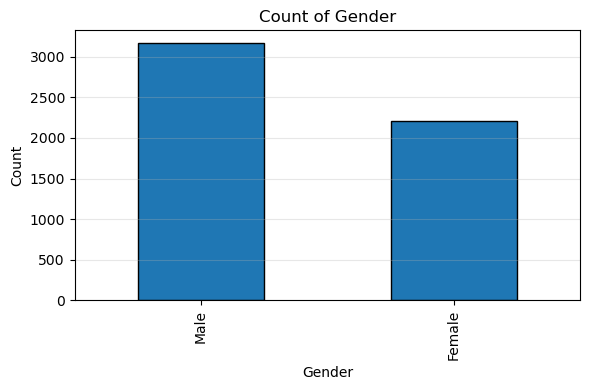

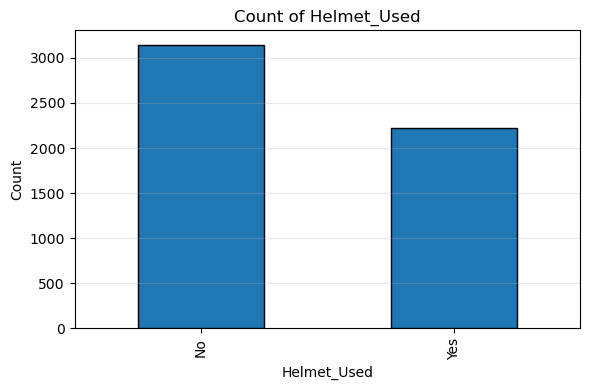

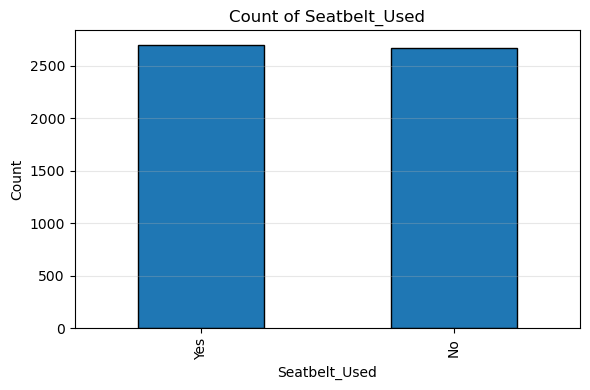

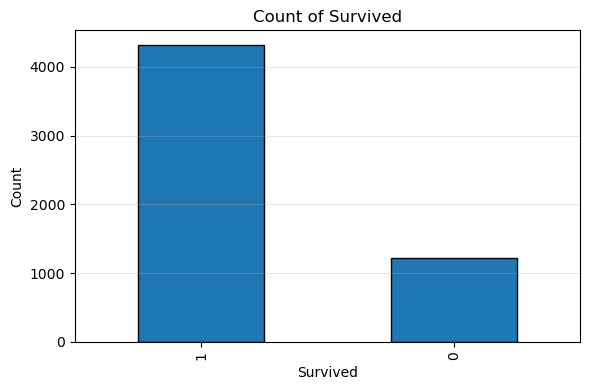

In [20]:
#  Bar charts for categorical variables
categorical_cols = ['Gender', 'Helmet_Used', 'Seatbelt_Used', 'Survived']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()


In [21]:
#Handle missing data
numeric_cols = ['Age', 'Speed_of_Impact']
categorical_cols = ['Gender', 'Helmet_Used', 'Seatbelt_Used']

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [22]:
# Treat outliers by capping at the 1st and 99th percentiles
for col in numeric_cols:
    lower, upper = np.percentile(df[col], [1, 99])
    df[col] = df[col].clip(lower=lower, upper=upper)


In [23]:
# Feature engineering
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 18, 35, 60, np.inf],
    labels=['Child/Teen', 'Young Adult', 'Adult', 'Senior']
)
df['High_Speed_Impact'] = (df['Speed_of_Impact'] > df['Speed_of_Impact'].median()).astype(int)


In [24]:
# Build preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols + ['Age_Group'])
])

In [25]:
# Splitting target
X = df.drop(columns=['Survived'])
y = df['Survived']

In [26]:
# Applying preprocessing
X_transformed = preprocessor.fit_transform(X)

In [27]:
# Reconstructing a DataFrame with the new feature names
num_features = numeric_cols
cat_features = preprocessor.named_transformers_['cat'] \
    .get_feature_names_out(categorical_cols + ['Age_Group']).tolist()
feature_names = num_features + cat_features + ['High_Speed_Impact']

X_final = pd.DataFrame(X_transformed, columns=num_features + cat_features)

In [28]:
# Append the High_Speed_Impact flag (it wasn’t transformed by the pipeline)
X_final['High_Speed_Impact'] = df['High_Speed_Impact'].values

In [29]:
#  Inspect
print("Processed feature matrix shape:", X_final.shape)
print(X_final.head())

Processed feature matrix shape: (5534, 9)
        Age  Speed_of_Impact  Gender_Male  Helmet_Used_Yes  Seatbelt_Used_Yes  \
0  0.419369        -1.459438          0.0              0.0                0.0   
1  1.150910        -0.813569          0.0              0.0                1.0   
2 -0.143355        -0.813569          1.0              1.0                1.0   
3 -0.931169         1.599941          1.0              0.0                1.0   
4  0.644458        -1.017528          0.0              1.0                1.0   

   Age_Group_Child/Teen  Age_Group_Senior  Age_Group_Young Adult  \
0                   0.0               0.0                    0.0   
1                   0.0               1.0                    0.0   
2                   0.0               0.0                    0.0   
3                   0.0               0.0                    1.0   
4                   0.0               0.0                    0.0   

   High_Speed_Impact  
0                  0  
1               

R² on test set: 0.45377717147093766
Test RMSE: 0.31204219705853775

Top coefficients:
                 feature  coefficient
1        Speed_of_Impact    -0.324298
8      High_Speed_Impact     0.132979
5   Age_Group_Child/Teen    -0.054981
6       Age_Group_Senior     0.018419
0                    Age    -0.005146
4      Seatbelt_Used_Yes    -0.003882
3        Helmet_Used_Yes     0.003249
7  Age_Group_Young Adult     0.001501
2            Gender_Male     0.000440

Variance Inflation Factors:
                 feature       VIF
0                  const  8.331102
1                    Age  8.673741
2        Speed_of_Impact  2.791930
3            Gender_Male  1.001696
4        Helmet_Used_Yes  1.003381
5      Seatbelt_Used_Yes  1.001592
6   Age_Group_Child/Teen  1.343144
7       Age_Group_Senior  4.100259
8  Age_Group_Young Adult  3.545684
9      High_Speed_Impact  2.790992


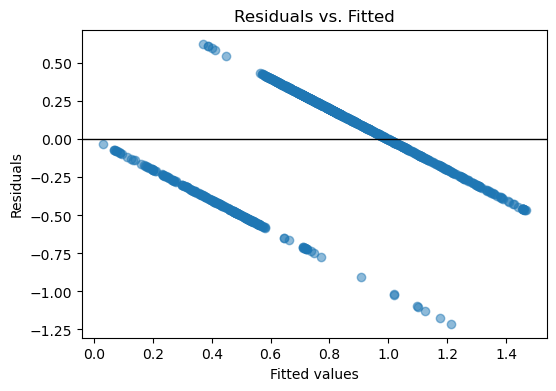

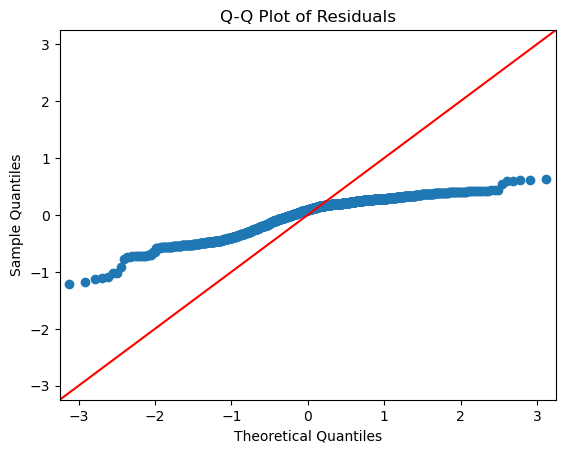

In [31]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor




#  Train_test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

#  Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

#  Predictions & performance
y_pred = lr.predict(X_test)
print("R² on test set:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

#  Coefficients
coef_df = pd.DataFrame({
    'feature': X_final.columns,
    'coefficient': lr.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)
print("\nTop coefficients:")
print(coef_df.head(10))

# Multicollinearity check via VIF
X_with_const = sm.add_constant(X_train)
vif_df = pd.DataFrame({
    'feature': X_with_const.columns,
    'VIF': [
        variance_inflation_factor(X_with_const.values, i)
        for i in range(X_with_const.shape[1])
    ]
})
print("\nVariance Inflation Factors:")
print(vif_df)

#  Residual diagnostics
residuals = y_test - y_pred

#    a) Residual vs. Fitted
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

#    b) Q-Q plot for normality
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


R-squared: 0.4538
Adjusted R-squared: 0.4493
Mean Absolute Error (MAE): 0.2623
Mean Squared Error (MSE): 0.0974
Root Mean Squared Error (RMSE): 0.3120


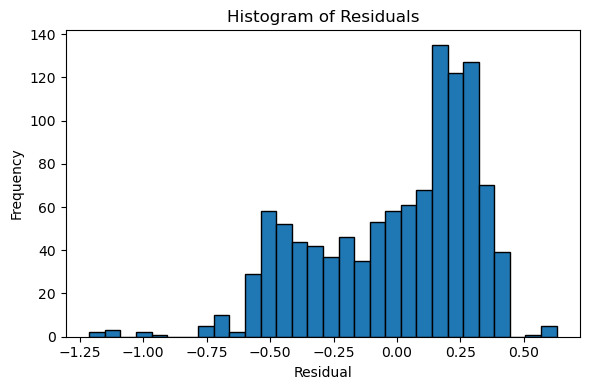

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# 4. Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 5. Evaluation metrics
n = X_test.shape[0]
p = X_test.shape[1]

r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


# Histogram of Residuals
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()